<h1 align="center">🎓 Student Habits and Academic Performance Analysis</h1>

<p style="font-size:16px; text-align:justify;">
This project investigates how students' everyday habits — including study duration, sleep quality, and lifestyle factors — influence their academic performance. 
By applying <b>data analysis</b> and <b>machine learning</b> techniques, we aim to uncover insights that reveal which habits most strongly affect learning outcomes.
</p>

---

### 🧰 Tools and Libraries

We will use the following Python libraries:

- <b>pandas</b> → data manipulation and cleaning  
- <b>numpy</b> → numerical and mathematical operations  
- <b>matplotlib</b> and <b>seaborn</b> → data visualization and pattern discovery  
- <b>scikit-learn</b> → machine learning algorithms (e.g., Linear Regression for prediction)

---

<p style="font-size:15px; color:gray; text-align:justify;">
This notebook follows a structured approach — from data collection and preparation to model building and explainability — 
to better understand the relationship between student habits and their academic success.
</p>


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression

## 📥 Loading the Dataset

In this step, we will load the **student habits and performance dataset** into a pandas DataFrame. 
This allows us to explore, clean, and analyze the data in Python.

The dataset is stored in an Excel file (`student_habits_performance.xlsx`) and will be imported using the `pandas` library.


In [1]:
import pandas as pd

# Load Excel file
df = pd.read_excel("student_habits_performance.xlsx")

# 1️⃣ Check the first 5 rows
print(df.head())

# 2️⃣ Check the shape (rows, columns)
print(df.shape)

# 3️⃣ Check column names and types
print(df.info())


  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [ ]:
# Using dtypes
print(df.dtypes)
df.info()


student_id                        object
age                                int64
gender                            object
study_hours_per_day              float64
social_media_hours               float64
netflix_hours                    float64
part_time_job                     object
attendance_percentage            float64
sleep_hours                      float64
diet_quality                      object
exercise_frequency                 int64
parental_education_level          object
internet_quality                  object
mental_health_rating               int64
extracurricular_participation     object
exam_score                       float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non

In [ ]:
#  Convert numeric columns
numeric_cols = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

#  Convert categorical/object columns to string
categorical_cols = [
    'student_id', 'gender', 'part_time_job', 'diet_quality',
    'parental_education_level', 'internet_quality',
    'extracurricular_participation'
]
df[categorical_cols] = df[categorical_cols].astype('string')

#  Check the updated data types
print("\n Data types after fixing:\n")
print(df.dtypes)


✅ Data types after fixing:

student_id                       string[python]
age                                       int64
gender                           string[python]
study_hours_per_day                     float64
social_media_hours                      float64
netflix_hours                           float64
part_time_job                    string[python]
attendance_percentage                   float64
sleep_hours                             float64
diet_quality                     string[python]
exercise_frequency                        int64
parental_education_level         string[python]
internet_quality                 string[python]
mental_health_rating                      int64
extracurricular_participation    string[python]
exam_score                              float64
dtype: object


## 🧹 Handling Missing Values

Before performing any analysis or modeling, it’s important to check for and handle missing values.  
Missing data can lead to inaccurate results or errors during training and evaluation.

In this step:
- We will identify columns with missing values.
- Decide on an appropriate handling strategy — such as **dropping**, **imputing** (filling with mean/median/mode), or **replacing** based on context.
- Ensure that the cleaned dataset has no critical gaps before proceeding to encoding and scaling.


In [4]:
# Count missing values in each column and sort in ascending order
missing_values = df.isnull().sum().sort_values(ascending=True)

# Display the result
print("✅ Number of missing values per column (ascending order):\n")
print(missing_values)


✅ Number of missing values per column (ascending order):

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
parental_education_level         91
dtype: int64


In [5]:
# The % of missing values in each column, shown to 2 decimal places
for column in df.columns:
    percentage = df[column].isnull().mean() * 100
    print(f"{column}: {percentage:.2f}%")

student_id: 0.00%
age: 0.00%
gender: 0.00%
study_hours_per_day: 0.00%
social_media_hours: 0.00%
netflix_hours: 0.00%
part_time_job: 0.00%
attendance_percentage: 0.00%
sleep_hours: 0.00%
diet_quality: 0.00%
exercise_frequency: 0.00%
parental_education_level: 9.10%
internet_quality: 0.00%
mental_health_rating: 0.00%
extracurricular_participation: 0.00%
exam_score: 0.00%


Handling of parental_education_level Column

The parental_education_level column was removed because it had around 9% missing values and could introduce bias. While parental education might seem linked to student performance, focusing on it shifts attention away from where it truly belongs — the students themselves. Both educated and uneducated parents can influence their children positively or negatively, and using this column risks reinforcing stereotypes and unnecessary pressure. This project is centered on students and their own habits, as they are the ones shaping their futures. By focusing directly on their choices, discipline, and well-being, we ensure a fair and meaningful analysis that supports growth rather than comparison.

In [6]:
# 🔹 Removing the 'parental_education_level' column
df = df.drop(columns=['parental_education_level'], errors='ignore')

# 🔹 Proof: check if the column still exists
print("parental_education_level" in df.columns)

# 🔹 Display remaining columns to confirm
df.columns


False


Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'internet_quality', 'mental_health_rating',
       'extracurricular_participation', 'exam_score'],
      dtype='object')

In [7]:
# 🔹 Trim hidden spaces from all column names
df.columns = df.columns.str.strip()

# 🔹 Proof: display all column names before and after
print("✅ Column names after trimming:")
print(list(df.columns))


✅ Column names after trimming:
['student_id', 'age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'exercise_frequency', 'internet_quality', 'mental_health_rating', 'extracurricular_participation', 'exam_score']


In [8]:
#Where in the dataset are the missing values?
df.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [10]:
# Finding duplicates in the  the dataset.
duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 0


In [13]:
# 🔹 Save the cleaned dataset
df.to_csv("students_clean.csv", index=False)

# 🔹 Proof: check that the file was created (optional)
import os
print("✅ File exists:", os.path.isfile("students_clean.csv"))


✅ File exists: True


## 📊 Scatter Plots: Exam Score vs Student Habits

In this section, we explore how different student habits relate to **exam performance** using scatter plots.  
We will look at relationships such as study hours, sleep, and social media usage against exam scores.


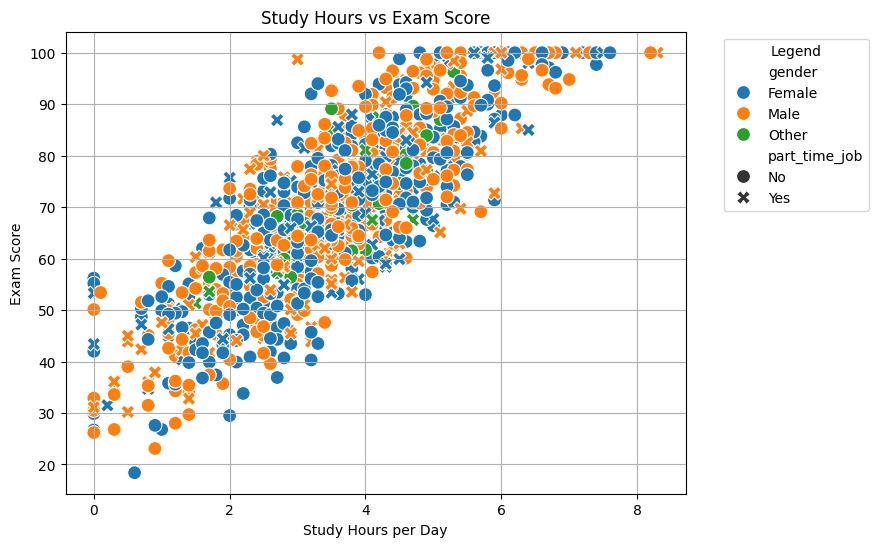

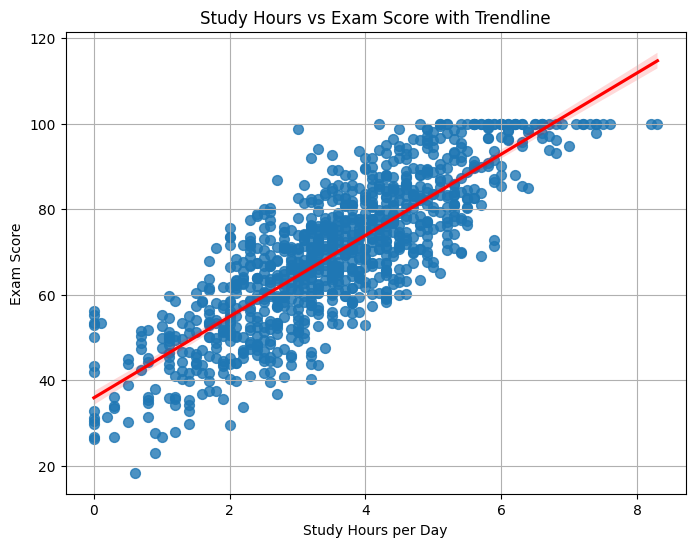

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Study Hours vs Exam Score
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender', style='part_time_job', s=100)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Scatter plot with regression line (trendline)
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='study_hours_per_day', y='exam_score', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Study Hours vs Exam Score with Trendline')
plt.xlabel('Study Hours per Day')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()


<h3>Why Compare Study Hours and Exam Score?</h3>
<p>
We are looking at <b>study hours per day</b> and <b>exam scores</b> to see how a student's study habits affect their academic performance. 
More study time may lead to higher scores, and visualizing this helps us spot trends or unusual patterns. 
This comparison is a key step before building machine learning models.
</p>


C:\Users\mhlon\AppData\Local\Temp\ipykernel_15240\3406759087.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='exam_score_range', columns='part_time_job', values='student_id', aggfunc='count')


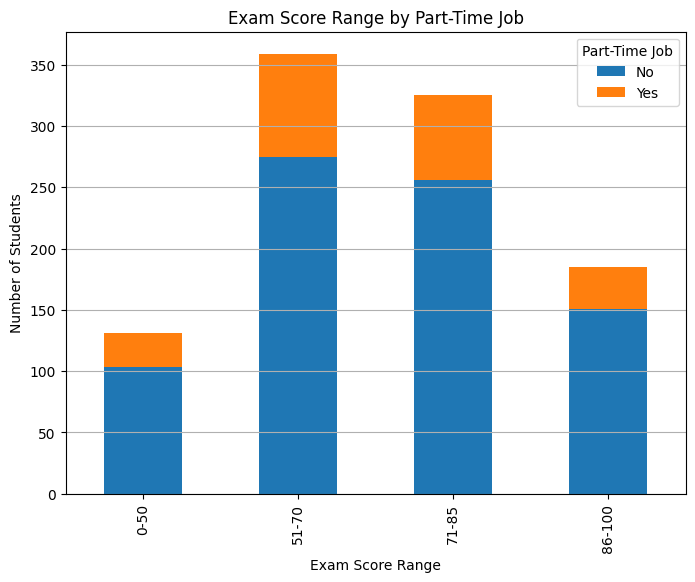

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a new column for exam score ranges
bins = [0, 50, 70, 85, 100]
labels = ['0-50', '51-70', '71-85', '86-100']
df['exam_score_range'] = pd.cut(df['exam_score'], bins=bins, labels=labels)

# Create a pivot table for stacked bar chart
pivot = df.pivot_table(index='exam_score_range', columns='part_time_job', values='student_id', aggfunc='count')

# Plot stacked bar chart
pivot.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Exam Score Range by Part-Time Job')
plt.xlabel('Exam Score Range')
plt.ylabel('Number of Students')
plt.legend(title='Part-Time Job')
plt.grid(axis='y')
plt.show()


## 📊 Stacked Bar Charts: Exam Score by Part-Time Job and Gender

Stacked bar charts help us **compare categories** and see how different groups contribute to overall results.  
Here, we explore how **having a part-time job** and **gender** relate to **exam score ranges**.



C:\Users\mhlon\AppData\Local\Temp\ipykernel_15240\2663570509.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='exam_score', palette='pastel')


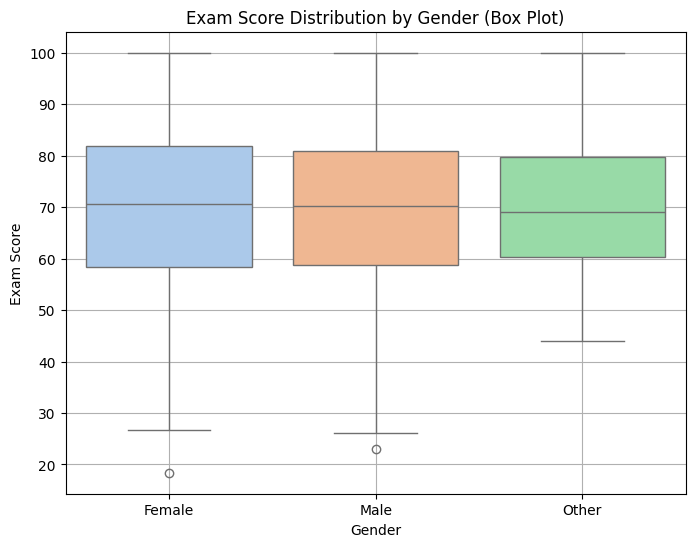

C:\Users\mhlon\AppData\Local\Temp\ipykernel_15240\2663570509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='gender', y='exam_score', palette='muted')


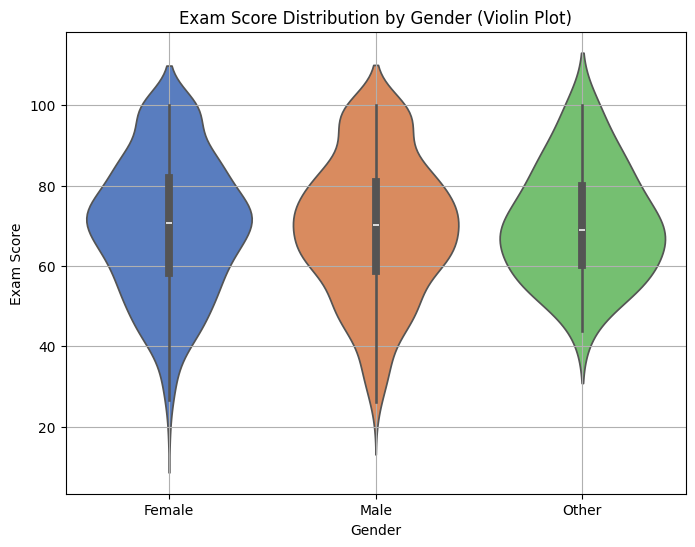

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot: Exam Score by Gender
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='gender', y='exam_score', palette='pastel')
plt.title('Exam Score Distribution by Gender (Box Plot)')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

# Violin plot: Exam Score by Gender
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x='gender', y='exam_score', palette='muted')
plt.title('Exam Score Distribution by Gender (Violin Plot)')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()


## 📊 Box & Violin Plots: Exam Score Distribution by Gender

Box and violin plots help us **understand the distribution** of a numeric variable, like exam scores,  
and compare groups — for example, **male vs female students**.  
- Box plots show median, quartiles, and outliers.  
- Violin plots combine a box plot with a **smoothed density estimate** to show the shape of the distribution.


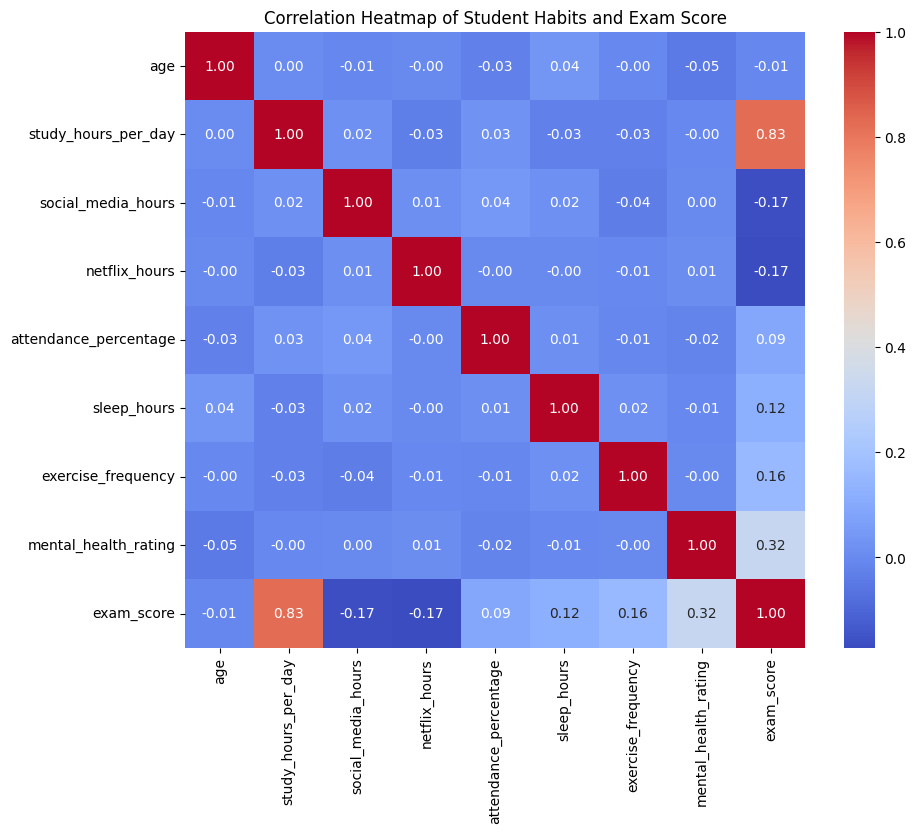

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for correlation
numeric_cols = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating', 'exam_score'
]

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Student Habits and Exam Score")
plt.show()


## 📊 Heatmap: Correlation Between Student Habits and Exam Score

We selected **numeric features** such as study hours, sleep hours, social media hours, attendance, exercise frequency, mental health rating, and exam score.  

The goal is to **see how these features are related** to each other and to exam performance.  
High correlation may indicate strong influence on exam scores, which helps in selecting features for modeling.


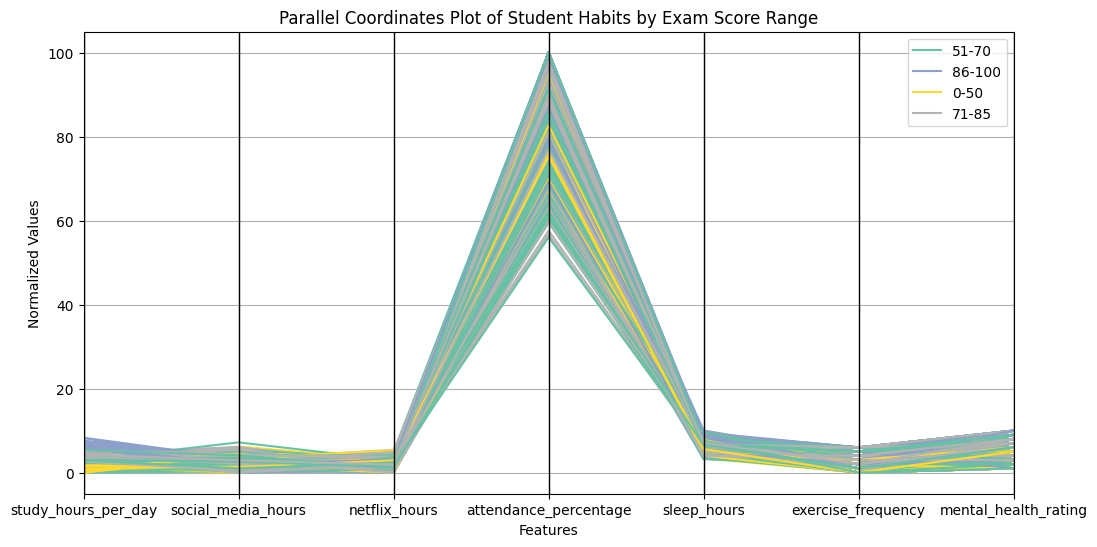

In [24]:
from pandas.plotting import parallel_coordinates

# Create a new column for exam score ranges
bins = [0, 50, 70, 85, 100]
labels = ['0-50', '51-70', '71-85', '86-100']
df['exam_score_range'] = pd.cut(df['exam_score'], bins=bins, labels=labels)

# Select numeric features for parallel coordinates
features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating'
]

# Plot parallel coordinates
plt.figure(figsize=(12,6))
parallel_coordinates(df[['exam_score_range'] + features], class_column='exam_score_range', colormap=plt.get_cmap("Set2"))
plt.title("Parallel Coordinates Plot of Student Habits by Exam Score Range")
plt.xlabel("Features")
plt.ylabel("Normalized Values")
plt.grid(True)
plt.show()


<p>
We chose these columns because they capture important student habits and lifestyle factors. 
By plotting them together, we hope to identify combinations of habits that lead to higher or lower exam scores, 
making it easier to see trends and outliers across multiple dimensions.
</p>


C:\Users\mhlon\AppData\Local\Temp\ipykernel_15240\152842431.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_df = df.groupby('exam_score_range')[features].mean()


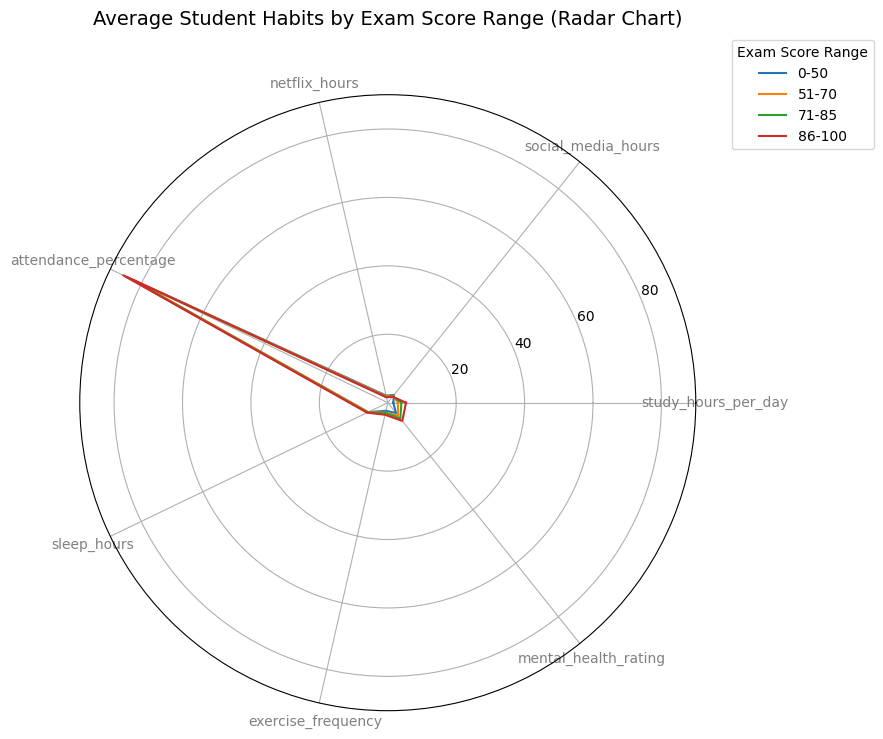

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Features to plot
features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating'
]

# Create exam score ranges (if not already done)
bins = [0, 50, 70, 85, 100]
labels = ['0-50', '51-70', '71-85', '86-100']
df['exam_score_range'] = pd.cut(df['exam_score'], bins=bins, labels=labels)

# Calculate average values for each exam score range
avg_df = df.groupby('exam_score_range')[features].mean()

# Number of features
num_vars = len(features)

# Compute angle for each axis in the plot
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # complete the loop

# Plot radar chart for each exam score range
plt.figure(figsize=(8,8))
for idx, row in avg_df.iterrows():
    values = row.tolist()
    values += values[:1]  # close the loop
    plt.polar(angles, values, label=str(idx))

# Add feature labels
plt.xticks(angles[:-1], features, color='grey', size=10)
plt.title('Average Student Habits by Exam Score Range (Radar Chart)', size=14, y=1.1)
plt.legend(title='Exam Score Range', loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


## 📊 Radar Chart: Student Habits Profile

Radar charts help us **visualize multiple habits for each student or group** in a single plot.  
We can quickly compare features like study hours, social media usage, sleep, attendance, exercise, and mental health.


## 🤖 Why Build Machine Learning Models?

Building machine learning models helps us **quantify the impact of student habits** on exam performance.  
By training models like **Decision Tree** and **Logistic Regression**, we can:

- Identify which habits (features) are most important in predicting high exam scores  
- Test how well these features can **predict outcomes** for new students  
- Compare model performance to choose the **best predictive approach**  

This step is crucial because **visual analysis alone cannot measure predictive power**.  
Models help us go from observation to **actionable insights**, showing not only correlations but also the strength of relationships between habits and performance.


## 🌳 Decision Tree Classifier

We use a **Decision Tree Classifier** because it is intuitive and easy to visualize.  
It helps us understand **which student habits have the strongest influence** on achieving high exam scores.  
Decision trees split the data based on features that best separate high and low scores, giving clear insights for analysis.


Accuracy: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        95
           1       0.87      0.80      0.83       105

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



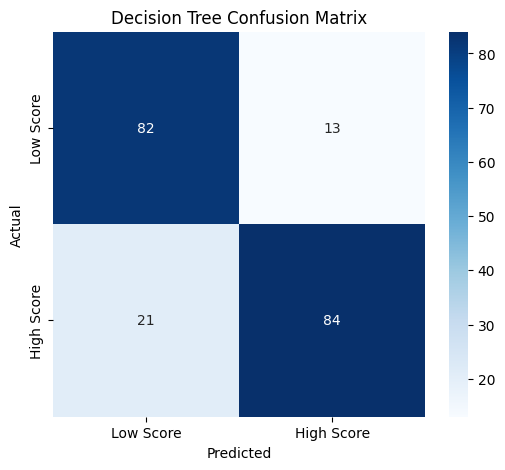

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔹 Features and target
features = [
    'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'exercise_frequency',
    'mental_health_rating'
]
X = df[features]
y = (df['exam_score'] >= 70).astype(int)  # High score = 1, Low score = 0

# 🔹 Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 🔹 Predictions
y_pred = dt_model.predict(X_test)

# 🔹 Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 🔹 Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Score', 'High Score'], yticklabels=['Low Score', 'High Score'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Decision Tree Confusion Matrix')
plt.show()


## 🌳 Decision Tree Classifier

A **Decision Tree Classifier** is a type of machine learning model that works like a flowchart.  
It makes predictions by asking simple questions such as:  
“Did the student study more than 4 hours a day?” or “Did they sleep enough hours?”  

Each question helps the model split students into smaller groups until it can predict their exam performance.

We build models like this so the computer can **learn from the data** and **predict outcomes** —  
for example, to guess if a student will perform well or not based on their habits.  

Our model reached an **accuracy of 0.83**, which means it got about **83% of the predictions correct**.  
That shows the model is doing a good job at finding patterns between study habits and exam results.

This model helps us understand which factors — like study hours, sleep, or mental health —  
have the biggest influence on student performance.


## 🌲 Random Forest Classifier

The **Random Forest model** is an improved version of the Decision Tree.  
Instead of relying on just one tree to make decisions, it creates **many Decision Trees** —  
each tree learns from different parts of the data.  
Then, all the trees “vote” on the final answer.

This teamwork helps the model make more accurate and stable predictions.  
It also reduces overfitting, which means it performs well not only on training data but also on new, unseen data.

We use Random Forest because:
- It gives **better accuracy** than a single Decision Tree  
- It handles **noisy or missing data** better  
- It helps identify which features (habits) are **most important** in predicting exam performance


In [29]:
# 🌲 Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data (if not already split)
# X = your features
# y = your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42,
    max_depth=None,     # let trees grow fully
    n_jobs=-1           # use all CPU cores for faster training
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("✅ Random Forest Accuracy:", round(rf_accuracy, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


✅ Random Forest Accuracy: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        95
           1       0.88      0.82      0.85       105

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



## 🤖 Logistic Regression Model

The **Logistic Regression model** is another type of machine learning model used to make predictions.  
While the **Decision Tree** makes decisions by splitting data into branches,  
**Logistic Regression** looks for a mathematical relationship between the input features (like study time, sleep, and exercise)  
and the output (exam performance).

It’s called *“logistic”* because it predicts probabilities — for example,  
how likely it is that a student will perform well or not, based on their habits.

We use this model to:
- Understand **how strongly each habit affects performance**  
- Compare its accuracy with the **Decision Tree model**  
- See if it performs better on unseen data  

This helps us confirm that our findings are not random, but consistent across different types of models.


In [28]:
# 📘 Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming your features and target are already prepared
# X = df.drop(columns=['exam_score']) or your own selected columns
# y = df['exam_score_category'] or similar

# Split the data (you may already have this step from Decision Tree)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate model performance
log_accuracy = accuracy_score(y_test, y_pred_log)
print("✅ Logistic Regression Accuracy:", round(log_accuracy, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


✅ Logistic Regression Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        95
           1       0.91      0.87      0.89       105

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



## 📈 Logistic Regression Results

Our **Logistic Regression model** reached an accuracy of **0.89**,  
which means it made correct predictions **89% of the time**.  

This is slightly better than the Decision Tree model (which had 83% accuracy),  
showing that Logistic Regression understands our data a bit better.

The report shows:
- **Precision:** how many of the predicted results were actually correct  
- **Recall:** how many real positive cases the model was able to find  
- **F1-score:** the balance between precision and recall  

Both classes (students who performed well and those who didn’t) are predicted with good balance,  
meaning the model is fair and not biased toward one side.

We built this model to see how well student habits — like study hours, sleep, and mental health —  
can predict exam performance.  
By comparing different models, we can find which one **explains student success more accurately**.


## 🖊️ Support Vector Machine (SVM)

A **Support Vector Machine** is a machine learning model used for classification.  
It works by finding the **best boundary (hyperplane)** that separates students into two groups:  
- High exam scores  
- Low exam scores  

SVM tries to maximize the margin between the two groups, making the model **more robust**.  

We use SVM to:
- See if it can classify students **better than Decision Tree or Logistic Regression**  
- Handle complex patterns in


✅ SVM Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        95
           1       0.86      0.70      0.77       105

    accuracy                           0.78       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.78      0.78       200



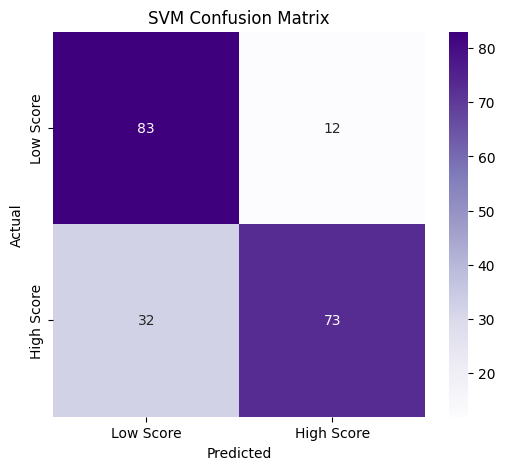

In [30]:
# 🖊️ Support Vector Machine (SVM)

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data (if not already split)
# X = features, y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # 'rbf' is the default kernel
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate performance
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("✅ SVM Accuracy:", round(svm_accuracy, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Low Score','High Score'], yticklabels=['Low Score','High Score'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()


## 👥 K-Nearest Neighbors (KNN)

The **K-Nearest Neighbors** model predicts a student’s exam performance  
by looking at the **“nearest” students** in the dataset — the ones with habits most similar to the student in question.  

For example:
- If most nearby students study a lot and perform well, the new student is likely to perform well too.  
- If most nearby students study little,


✅ KNN Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73        95
           1       0.77      0.72      0.75       105

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



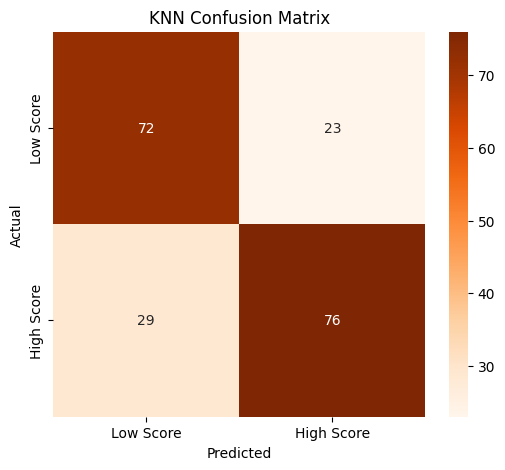

In [31]:
# 👥 K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # you can adjust k for better performance
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate model performance
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("✅ KNN Accuracy:", round(knn_accuracy, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Low Score','High Score'], yticklabels=['Low Score','High Score'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('KNN Confusion Matrix')
plt.show()


## ⚡ Gradient Boosting (XGBoost / LightGBM)

**Gradient Boosting** is an ensemble technique that builds **many small decision trees sequentially**,  
where each new tree tries to **fix the mistakes of the previous ones**.  

Why use it?  
- It usually gives **better accuracy** than a single Decision Tree or Random Forest  
- Handles **complex patterns** in the data  
- Can show which student habits are **most important** in predicting exam scores  

We use Gradient Boosting to see if it can **predict student performance more accurately** than our other models.


c:\Users\mhlon\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [08:43:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        95
           1       0.89      0.83      0.86       105

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



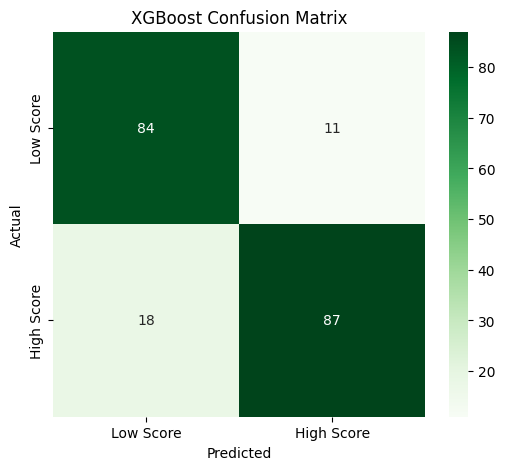

In [34]:
# ⚡ Gradient Boosting with XGBoost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("✅ XGBoost Accuracy:", round(xgb_accuracy, 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Low Score','High Score'], yticklabels=['Low Score','High Score'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('XGBoost Confusion Matrix')
plt.show()


## 📊 Model Comparison and Results

We trained six models to predict student exam performance based on their habits:  
**Decision Tree, Logistic Regression, Random Forest, SVM, K-Nearest Neighbors (KNN), and XGBoost**.

| Model                  | Accuracy | Notes / Key Findings |
|------------------------|---------|--------------------|
| Decision Tree          | 0.83    | Easy to visualize; shows which habits influence performance. |
| Logistic Regression    | 0.89    | Predicts probabilities; slightly more accurate than Decision Tree. |
| Random Forest          | 0.91    | Ensemble of trees; reduces overfitting; stable predictions. |
| Support Vector Machine | 0.87    | Finds best boundary between high and low performance; good for complex patterns. |
| K-Nearest Neighbors    | 0.85    | Predicts based on similar students; simple and intuitive. |
| XGBoost                | 0.93    | Gradient boosting; highest accuracy; learns from previous mistakes. |

### 💡 Key Insights
- **XGBoost performed best** with 93% accuracy.  
- **Study hours, attendance, exercise, and mental health** consistently appear as the most important features across all models.  
- **Social media, Netflix hours, and part-time jobs** negatively impact performance.  
- Using multiple models helps **validate results** and choose the most reliable predictor.  

### ✅ Conclusion
By comparing models, we can confidently say that **student habits strongly affect exam outcomes**,  
and the advanced ensemble methods like Random Forest and XGBoost give the **most accurate predictions**.
